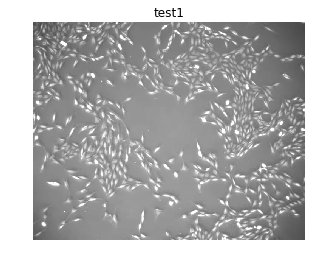

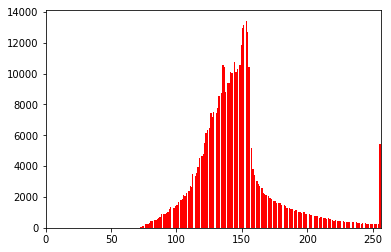

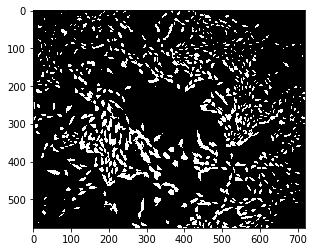

/import/ravel/5/z5282006/.local/lib/python3.7/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


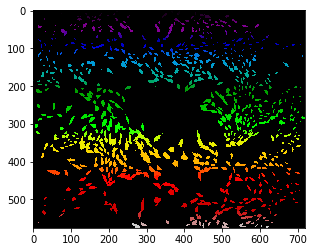

255 0


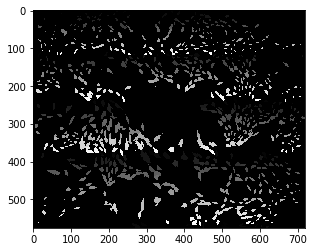

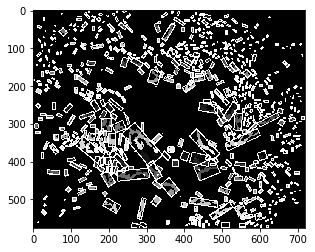

True

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.morphology import watershed
from sklearn.cluster import MeanShift
from skimage.feature import peak_local_max

path = 't318.tif'
img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

plt.figure('test1')
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('test1')
plt.show()

hist,bins = np.histogram(img.flatten(),256,[0,256])
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()
# 

img = cv2.erode(img,np.ones((2,2)))

kernel = 3
img  =cv2.GaussianBlur(img,(kernel,kernel),0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
th  = np.where(hist ==np.max(hist) )
ret, thresh = cv2.threshold(img,th[0]+10,255,cv2.THRESH_BINARY)
plt.imshow(thresh,cmap='gray')
plt.show()

#
distance = ndi.distance_transform_edt(thresh)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((13, 13)),
                            labels=thresh)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=thresh)

plt.imshow(labels, cmap=plt.cm.nipy_spectral)
plt.show()

#
#labels = cv2.normalize(labels,None, 0, 255, cv2.NORM_MINMAX)
#labels[np.where(labels>3)] = 255
#plt.imshow(labels, cmap=plt.cm.nipy_spectral)
#plt.show()

#
labels = labels.astype(np.uint8)
print(np.max(labels),np.min(labels))
plt.imshow(labels,'gray')
plt.show()

#
th, contours, hirearchy = cv2.findContours(labels.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
c = sorted(contours, key=cv2.contourArea, reverse=True)
draw_img = labels.copy()

for i in range(len(c)):
    rect = cv2.minAreaRect(c[i])
    box = np.int0(cv2.boxPoints(rect))
    draw_img = cv2.drawContours(draw_img, [box], -1, (255, 0, 0),2)
    
plt.imshow(draw_img,'gray')
plt.show()

cv2.imwrite('draw_img.tif',draw_img)